# Session 4.2 Classification

### Goals:

1. Linear Data, Linear Model
2. Quad Data, Linear Model
3. Quad Data, Quad Model

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from IPython import display

import seaborn as sns
import torch
import torch.nn as nn

In [2]:
torch.manual_seed(42)

In [3]:
def viz_1d(X, Y, title = None):
    
    if isinstance(Y, torch.Tensor):
        Y = Y.detach()
        
    plt.figure(figsize=(7, 4))
    if title:
        plt.title(title)
    plt.scatter(X, Y)
    plt.show()
    
def viz_2d(X, Y, title=None):
    plt.figure(figsize=(16, 10))
    plt.title("Dataset" if not title else title)
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap="viridis")
    plt.show()
  
def viz_all(X, Y, model, f=None, ax=None, save=False, name_to_save=""):
    sns.set(style="white")

    xx, yy = np.mgrid[-1.1:1.1:.01, -1.1:1.1:.01]
    grid = np.c_[xx.ravel(), yy.ravel()]
    batch = torch.from_numpy(grid).type(torch.float32)
    with torch.no_grad():
        probs = model(batch).reshape(xx.shape)
        probs = probs.numpy().reshape(xx.shape)
        
    if (f is None and ax is not None) or (f is not None and ax is None):
        raise ValueError(f"F and AX both should either be None or not")
    
    old_ax = False
    if f is None and ax is None:
        f, ax = plt.subplots(figsize=(16, 10))
        old_ax = True
        
        
    ax.set_title("Decision boundary", fontsize=14)
    contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                          vmin=0, vmax=1)
    ax_c = f.colorbar(contour)
    ax_c.set_label("$P(y = 1)$")
    ax_c.set_ticks([0, .25, .5, .75, 1])


    

    ax.scatter(X[:,0], X[:, 1], c=Y[:], s=50,
               cmap="RdBu", vmin=-.2, vmax=1.2,
               edgecolor="white", linewidth=1)

    ax.set(xlabel="$X_1$", ylabel="$X_2$")
    
    if not old_ax:
        plt.show()

    
def report(model: torch.nn.Module, title='Parameters before update:'):
    op = title[::]
    for np in model.named_parameters():
        op += f"\n\t{np[0]}: {np[1].data.item() if not np[1].shape.__len__()>1 else np[1].data}\tgrad: {np[1].grad if np[1].grad is not None else None}"
    print(op)

In [4]:

def true_fn_lin(x):
    return float(float(2.3*x[0] + 0.1) > x[1])



n_samples = 200
X_lin = torch.randint(-400, 400, (n_samples,2)).float() / 400
Y_lin = torch.tensor([true_fn_lin(x) for x in X_lin])


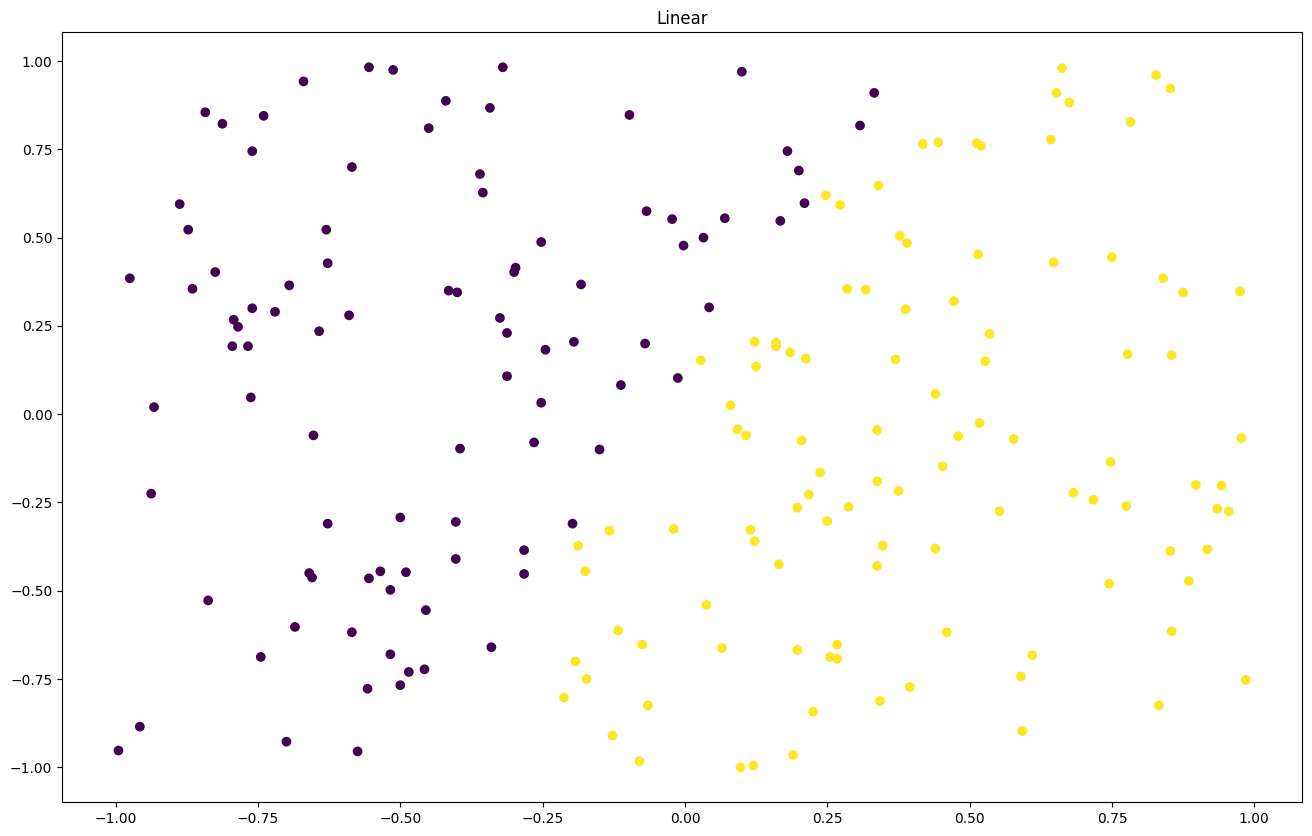

In [5]:
viz_2d(X_lin, Y_lin, 'Linear')